# Heart Disease Diagnostic Analysis

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading data using pandas
data = pd.read_csv("heart.csv")

In [3]:
#getting data of first 5 rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# shape
data.shape

(1025, 14)

In [5]:
#columns present in dataset
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
#data types of columns
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
#information or summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
#staristical summary of the dataframe
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#NULL values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#number of unique values for each variable
data.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [11]:
#Function to convert Numerical Data into Categorical Data
def heart_disease_toNumeric(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [12]:
#Creating new column as heart_disease by converting numerical data into categorical data
data['heart_disease']=data['target'].apply(heart_disease_toNumeric)

In [13]:
#removing target column
data.drop('target',axis = 1,inplace=True)

In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,Absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,Absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,Absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,Absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,Absence


In [15]:
#check total number of people affected by heart disease
hdata = data.groupby('heart_disease').size()
hdata

heart_disease
Absence     499
Presence    526
dtype: int64

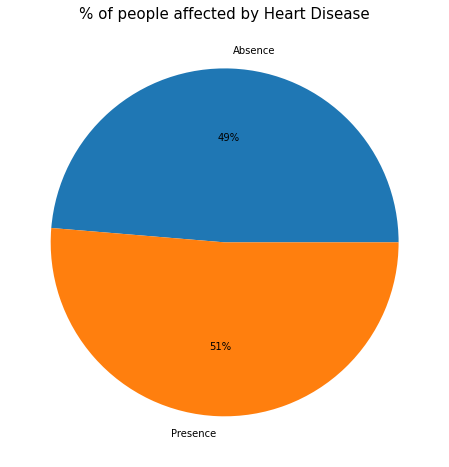

In [16]:
#piechart to display % of people affected by Heart Disease
plt.figure(figsize=(25,8))
plt.pie(hdata, labels=['Absence','Presence'], autopct='%0.0f%%')
plt.title('% of people affected by Heart Disease', fontsize=15)
plt.show()

From the above pie chart we observed that people not having heart disease are lesser than those who have heart disease

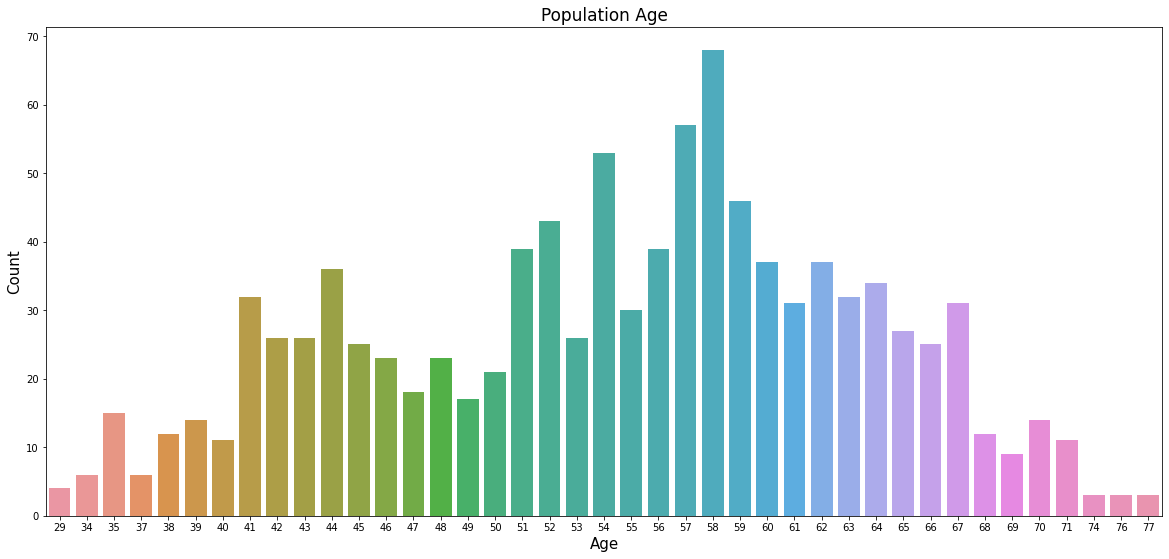

In [17]:
#Countplot of Population Age 
plt.figure(figsize=(20,9))
sns.countplot(x='age', data=data)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [18]:
min_age=data['age'].min()
max_age=data['age'].max()
mean_age=data['age'].mean()
print("Minimum Age =",min_age)
print("Maximum Age =",max_age)
print("Mean Age =",mean_age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43414634146342


In [19]:
#Converting population into young, middle, elder based on age
young_ages=data[(data['age']>=29) & (data['age']<40)]
middle_ages=data[(data['age']>=40) & (data['age']<55)]
elderly_ages=data[(data['age']>55)]
print('Number of people as per age category:')
print('Young Ages =',len(young_ages))
print('Middle Ages =',len(middle_ages))
print('Elderly Ages =',len(elderly_ages))

Number of people as per age category:
Young Ages = 57
Middle Ages = 419
Elderly Ages = 519


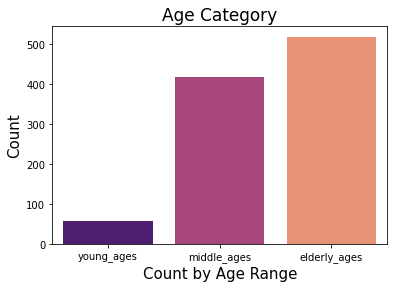

In [20]:
#Bar Plot Creation for count by Age Category
sns.barplot(x=['young_ages','middle_ages','elderly_ages'], y=[len(young_ages), len(middle_ages), len(elderly_ages)], palette='magma')
plt.title('Age Category', fontsize=17)
plt.xlabel('Count by Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [21]:
#Converting Numerical Data into Categorical Data
def gender_toCat(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [22]:
#creating new column for categorical gender data
data['gender'] = data['sex'].apply(gender_toCat)

In [23]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease,gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,Absence,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,Absence,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,Absence,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,Absence,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,Absence,Female


In [24]:
#dropping sex column
data.drop('sex',axis = 1,inplace=True)

In [25]:
data.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease,gender
0,52,0,125,212,0,1,168,0,1.0,2,2,3,Absence,Male
1,53,0,140,203,1,0,155,1,3.1,0,0,3,Absence,Male
2,70,0,145,174,0,1,125,1,2.6,0,0,3,Absence,Male
3,61,0,148,203,0,1,161,0,0.0,2,1,3,Absence,Male
4,62,0,138,294,1,1,106,0,1.9,1,3,2,Absence,Female


In [26]:
#Converting age Numerical Data into Categorical Data
def age_toCat(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'
data['age_range']=data['age'].apply(age_toCat)

In [27]:
data.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease,gender,age_range
0,52,0,125,212,0,1,168,0,1.0,2,2,3,Absence,Male,Middle Age
1,53,0,140,203,1,0,155,1,3.1,0,0,3,Absence,Male,Middle Age
2,70,0,145,174,0,1,125,1,2.6,0,0,3,Absence,Male,Elder Age
3,61,0,148,203,0,1,161,0,0.0,2,1,3,Absence,Male,Elder Age
4,62,0,138,294,1,1,106,0,1.9,1,3,2,Absence,Female,Elder Age


D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


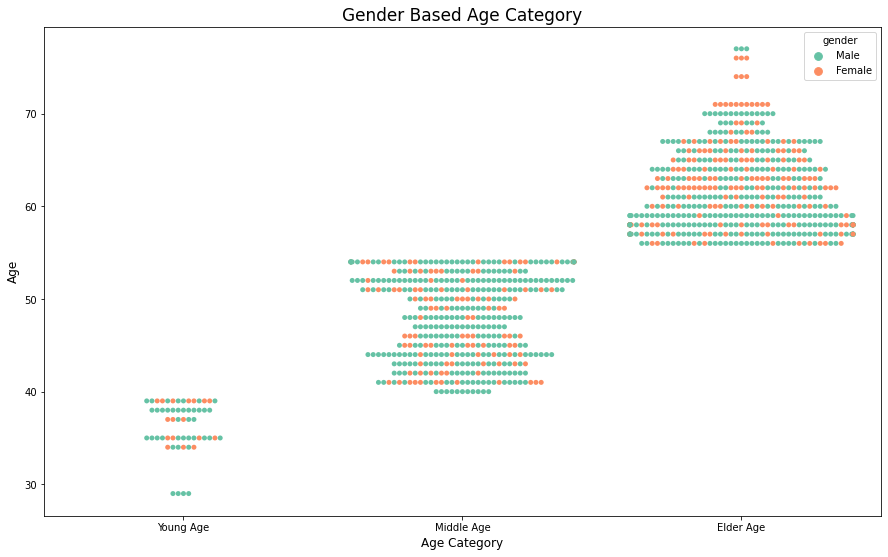

In [28]:
#Swarm Plot Creation of Gender Based Age Category
plt.figure(figsize=(15,9))
sns.swarmplot(x='age_range', y='age', hue='gender', data=data, order=['Young Age','Middle Age','Elder Age'], palette='Set2')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

Males are mostly affected by heart disease according to age category.

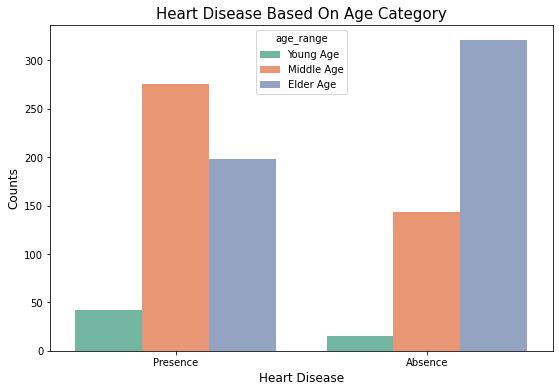

In [29]:
#Count plot for heart disease based on age category
plt.figure(figsize=(9,6))
sns.countplot(x='heart_disease', hue='age_range', data=data, order=['Presence','Absence'], hue_order=['Young Age', 'Middle Age', 'Elder Age'], palette='Set2')
plt.title('Heart Disease Based On Age Category', fontsize=15)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

In [30]:
group_data = data.groupby(['age_range','heart_disease'])['heart_disease'].count()

In [31]:
group_data

age_range   heart_disease
Elder Age   Absence          321
            Presence         198
Middle Age  Absence          143
            Presence         276
Young Age   Absence           15
            Presence          42
Name: heart_disease, dtype: int64

Presence of heart disease is more in Middle age people

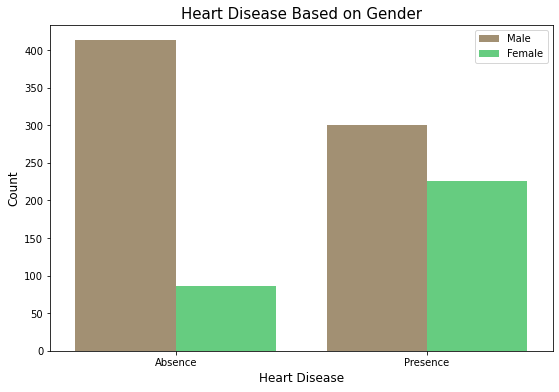

In [32]:
#Count plot for heart disease based on gender
plt.figure(figsize=(9,6))
sns.countplot(x='heart_disease', hue='gender', data=data, palette='terrain_r')
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=15)
plt.show()

We can see that Males are more prone to Heart Disease

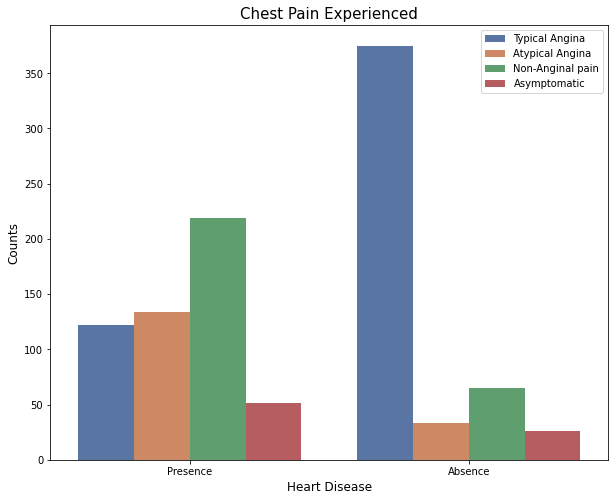

In [33]:
#Count Plot for chest pain experienced by presence or absence of heart disease
plt.figure(figsize=(10,8))
sns.countplot(x='heart_disease', hue='cp', data=data, order=['Presence','Absence'],palette='deep')
plt.title('Chest Pain Experienced', fontsize=15)
plt.xlabel('Heart Disease',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

People having non-anginal chest pain have a higher chance of heart disease.

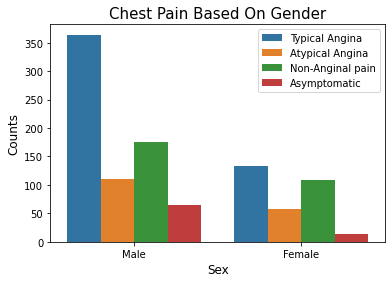

In [34]:
#Count plot for chest pain based on Gender
sns.countplot(x='gender', hue='cp', data=data)
plt.title('Chest Pain Based On Gender', fontsize=15)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

 Higher number of men are suffering from Asymptomatic type of chest pain

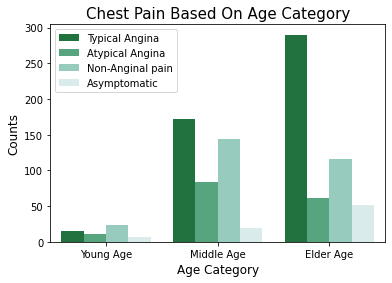

In [35]:
#Count plot for chest pain based On age category
sns.countplot(x='age_range', hue='cp', data=data, order=['Young Age', 'Middle Age', 'Elder Age'], palette='BuGn_r')
plt.title('Chest Pain Based On Age Category', fontsize=15)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

Elderly age Category is very high number of asymptomatic pain

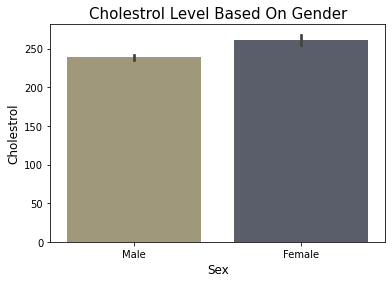

In [36]:
#Bar plot for cholestrol level based on gender
sns.barplot(x='gender', y='chol', data=data, palette='cividis_r')
plt.title("Cholestrol Level Based On Gender", fontsize=15)
plt.xlabel('Sex',fontsize=12)
plt.ylabel("Cholestrol", fontsize=12)
plt.show()

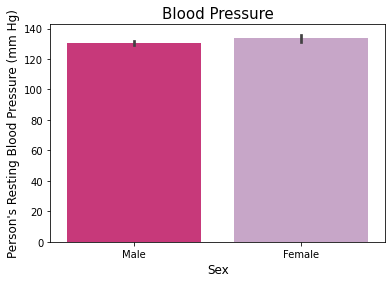

In [37]:
#Bar plot for people resting blood pressure
sns.barplot(x='gender', y='trestbps', data=data, palette='PuRd_r')
plt.title("Blood Pressure", fontsize=15)
plt.xlabel('Sex',fontsize=12)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

 Blood Pressure Rate is almost equal in Males and Females

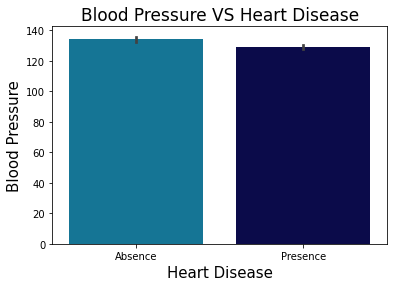

In [49]:
#Bar plot creation of blood pressure and heart disease
sns.barplot(x='heart_disease', y='trestbps', data=data, palette='ocean_r')
plt.title('Blood Pressure VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

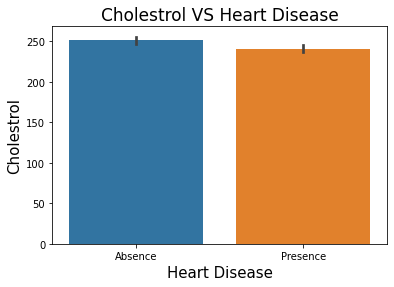

In [48]:
#Bar plot for cholestrol and heart disease
sns.barplot(x='heart_disease', y='chol', data=data)
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

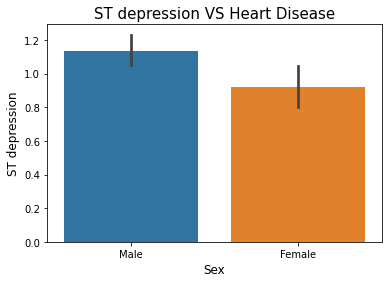

In [47]:
#Bar plot creation of ST depression and heart disease
sns.barplot(x='gender', y='oldpeak', data=data)
plt.title('ST depression VS Heart Disease', fontsize=15)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('ST depression', fontsize=12)
plt.show()

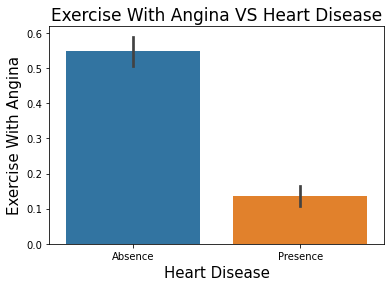

In [51]:
#Bar Plot Creation of Exercise With Angina VS Heart Disease using MatplotLib and Seaborn
sns.barplot(x='heart_disease', y='exang', data=data)
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

<AxesSubplot:>

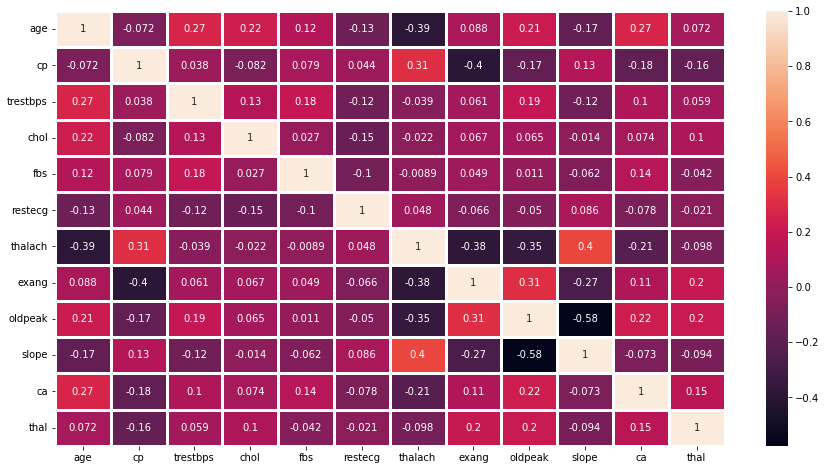

In [52]:
#Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, linewidth=3)